In [61]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [24]:
n311 = pd.read_csv(os.getenv('PUIDATA') + '/311_Service_Requests_2015_noise.csv')

In [25]:
len(n311)

386318

In [48]:
n311['geometry'] = n311.apply(lambda z: Point(z.Longitude, z.Latitude), axis=1)
n311 = gpd.GeoDataFrame(n311)

In [2]:
zipcode = gpd.read_file(os.getenv("PUIDATA") + '/ZIP_CODE_040114/ZIP_CODE_040114.shp')

In [8]:
tree = pd.read_csv(os.getenv("PUIDATA") + "/2015StreetTreesCensus_TREES.csv")

In [47]:
tree['geometry'] = tree.apply(lambda z: Point(z.longitude, z.Latitude), axis=1)
tree = gpd.GeoDataFrame(tree)

In [49]:
n311.crs = {'init' :'epsg:4326'}
tree.crs = {'init' :'epsg:4326'}
zipcode = zipcode.to_crs({'init': 'epsg:4326'})

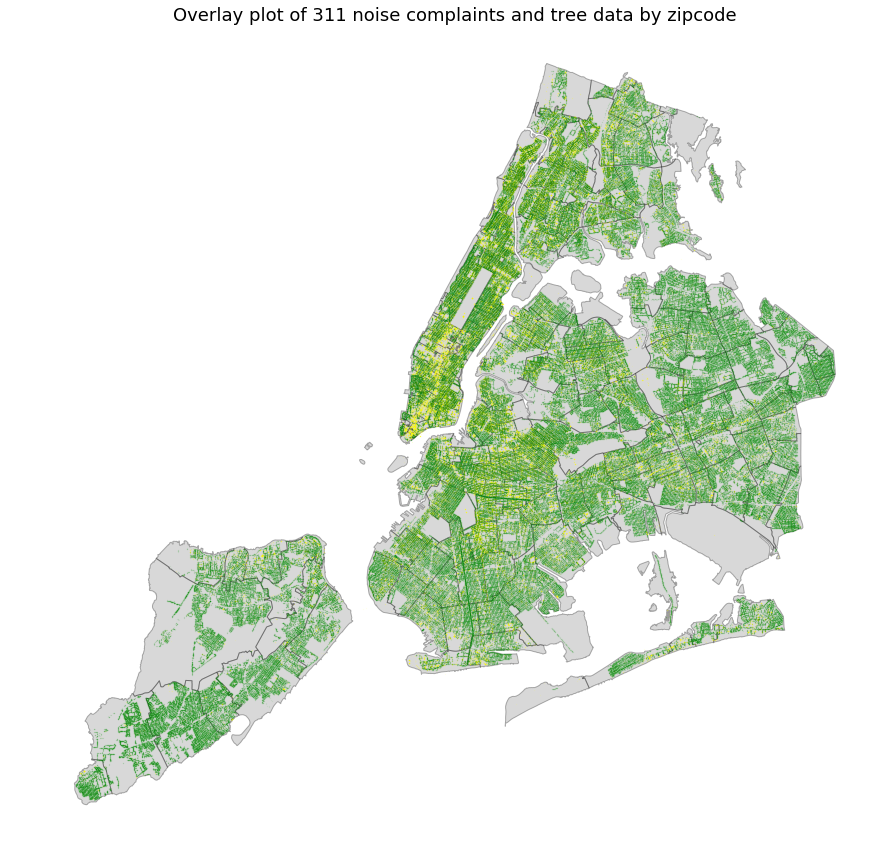

In [179]:
fig, ax = plt.subplots(figsize=(15,15))
zipcode.plot(ax=ax, edgecolor='k', color='grey', alpha=0.3)
n311.plot(ax=ax, color='yellow', markersize=0.1, alpha=0.1)
tree.plot(ax=ax, color='green', markersize=0.1, alpha=0.1)
#pop_ny.plot(ax=ax, color='grey', alpha='1')
ax.axis('off')
ax.set_title("Overlay plot of 311 noise complaints and tree data by zipcode", fontsize=18)
ax.plot;

### Figure 1. This map shows the spatial distribution of 311 noise complaint data and trees by zipcode in NYC.

In [65]:
pop2015 = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_5YR_B02001/ACS_16_5YR_B02001_with_ann.csv", header=1)

In [66]:
pop2015.head()

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,...,Estimate; Total: - Native Hawaiian and Other Pacific Islander alone,Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races"
0,0600000US3606144919,3606144919,"Manhattan borough, New York County, New York",1634989,*****,928883,5432,244787,3197,6173,...,946,202,192292,6079,69335,3324,15444,1849,53891,2915
1,8600000US00601,601,ZCTA5 00601,17800,299,14436,699,108,72,21,...,0,21,3046,597,189,166,26,22,163,164
2,8600000US00602,602,ZCTA5 00602,39716,188,22941,1457,968,373,0,...,0,28,1544,595,14189,1503,164,131,14025,1496
3,8600000US00603,603,ZCTA5 00603,51565,785,35176,1177,2149,435,106,...,11,19,6610,908,6875,858,333,229,6542,853
4,8600000US00606,606,ZCTA5 00606,6320,233,3739,441,175,130,0,...,0,19,2246,451,160,121,77,80,83,99


In [67]:
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,POLYGON ((-73.80584847647394 40.68290932644246...
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.93739763139813 40.67972958925084...
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.90294132545438 40.67083977590007...
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,POLYGON ((-73.95797316043482 40.67065695897566...
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.97208109564257 40.6505965872761,..."


In [72]:
pop2015.Id2 = pop2015.Id2.astype(int)
zipcode.ZIPCODE = zipcode.ZIPCODE.astype(int)

In [73]:
pop_ny = pd.merge(zipcode, pop2015, how='inner', left_on="ZIPCODE", right_on="Id2")

In [79]:
pop_ny.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'Id', 'Id2', 'Geography', 'Estimate; Total:',
       'Margin of Error; Total:', 'Estimate; Total: - White alone',
       'Margin of Error; Total: - White alone',
       'Estimate; Total: - Black or African American alone',
       'Margin of Error; Total: - Black or African American alone',
       'Estimate; Total: - American Indian and Alaska Native alone',
       'Margin of Error; Total: - American Indian and Alaska Native alone',
       'Estimate; Total: - Asian alone',
       'Margin of Error; Total: - Asian alone',
       'Estimate; Total: - Native Hawaiian and Other Pacific Islander alone',
       'Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone',
       'Estimate; Total: - Some other race alone',
       'Margin of Error; Total: - Some other race alone',
       'Estimate; Total: - Two or more 

In [80]:
pop_ny = pop_ny[['ZIPCODE','POPULATION','geometry']]

In [111]:
mrg_n311 = gpd.sjoin(zipcode, n311, how='inner', op='intersects')
mrg_n311 = mrg_n311.groupby(['ZIPCODE'])['ZIPCODE'].count()
mrg_n311 = pd.DataFrame(mrg_n311)
mrg_n311.columns = ['count']
mrg_n311 = mrg_n311.reset_index()

In [126]:
mrg_tree = gpd.sjoin(zipcode, tree, how='inner', op='intersects')
mrg_tree = mrg_tree.groupby(['ZIPCODE'])['ZIPCODE'].count()
mrg_tree = pd.DataFrame(mrg_tree)
mrg_tree.columns = ['count']
mrg_tree = mrg_tree.reset_index()

In [127]:
mrg_n311.columns = ['ZIPCODE','n311']
mrg_tree.columns = ['ZIPCODE','ntree']

In [128]:
mrg = pd.merge(pop_ny, mrg_n311, how='inner', on="ZIPCODE")
mrg = pd.merge(mrg, mrg_tree, how='inner', on="ZIPCODE")

In [129]:
mrg.head()

,ZIPCODE,POPULATION,geometry,n311,ntree
0,11436,18681.0,POLYGON ((-73.80584847647394 40.68290932644246...,880,2407
1,11213,62426.0,POLYGON ((-73.93739763139813 40.67972958925084...,3937,3652
2,11212,83866.0,POLYGON ((-73.90294132545438 40.67083977590007...,2649,4205
3,11225,56527.0,POLYGON ((-73.95797316043482 40.67065695897566...,4433,2868
4,11218,72280.0,"POLYGON ((-73.97208109564257 40.6505965872761,...",2042,4868


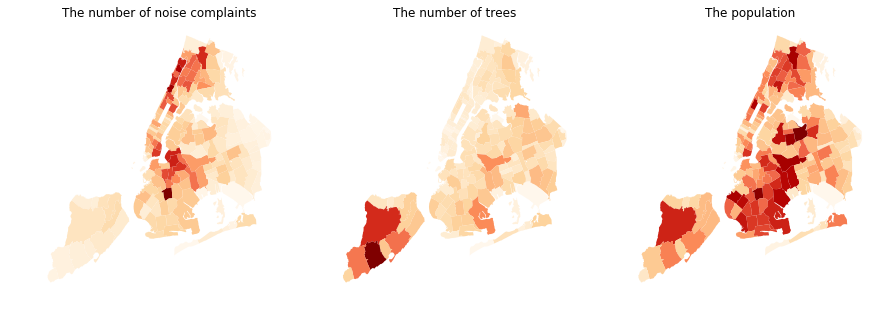

In [163]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,'col', figsize=(15,5))
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title('The number of noise complaints')
ax2.set_title('The number of trees')
ax3.set_title('The population')
mrg.plot(ax=ax1,column='n311', cmap='OrRd')
mrg.plot(ax=ax2,column='ntree', cmap='OrRd')
mrg.plot(ax=ax3,column='POPULATION', cmap='OrRd')

### Figure 2. Cartographs show the number of noise complatins, the number of trees and the population respectively by zipcode in NYC.

In [164]:
mrg['n311_pop'] = mrg.n311/mrg.POPULATION

In [167]:
mrg.describe()

,ZIPCODE,POPULATION,n311,ntree,n311_pop
count,199.000000,199.00000,199.000000,199.000000,199.000000
mean,10808.582915,41981.58794,1960.120603,3514.386935,inf
std,581.964855,27602.66964,1736.755516,2912.391037,NaN
min,10001.000000,0.00000,1.000000,7.000000,0.002264
25%,10281.000000,20106.50000,565.500000,1742.500000,0.024503
50%,11103.000000,38944.00000,1643.000000,3179.000000,0.041712
75%,11361.500000,61158.00000,2693.000000,4663.500000,0.068148
max,11697.000000,109069.00000,7838.000000,22186.000000,inf


In [172]:
mrg_drop = mrg.replace([np.inf, -np.inf], np.nan).dropna(subset=["n311_pop"], how="all")

In [173]:
mrg_drop.describe()

,ZIPCODE,POPULATION,n311,ntree,n311_pop
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,10820.510309,43063.587629,2010.340206,3603.500000,0.051315
std,578.727255,27107.373388,1730.190809,2895.515819,0.047238
min,10001.000000,16.000000,1.000000,9.000000,0.002264
25%,10302.250000,23403.500000,616.500000,1811.750000,0.023979
50%,11104.500000,39249.000000,1654.000000,3236.500000,0.039668
75%,11361.750000,61920.000000,2749.500000,4692.000000,0.066152
max,11697.000000,109069.000000,7838.000000,22186.000000,0.500000


In [178]:
lm = smf.ols(formula='n311 ~ POPULATION + ntree', data=mrg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   n311   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     119.1
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           1.42e-34
Time:                        17:59:08   Log-Likelihood:                -1687.2
No. Observations:                 199   AIC:                             3380.
Df Residuals:                     196   BIC:                             3390.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    498.0146    156.677      3.179      0.002     189.026     807.004
POPULATION     0.0547      0.004     15.379      0.000       0.048       0.062
ntree         -0.2375      0.034     -7.044      0.000      -0.304      -0.171
==============================================================================
Omnibus:                       38.412   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.885
Skew:                           0.893   Prob(JB):                     1.00e-18
Kurtosis:                       5.608   Cond. No.                     9.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Table1. We employed multivariable regression to find out effects of tree on the number of noise complaints in New York City. The population variable is used as control variable. The result is showing that the number of trees tend to reduce noise complaints in NYC. It suggest that more trees could reduce the noise bothering citizen.